In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Dataset/BTC_USD-Binance-Historical-Data.csv')
df = df.sort_index(ascending=False)
df

,Date,Price,Open,High,Low,Vol.,Change %
1827,3/1/2019,"3,823.20","3,813.60","3,856.30","3,813.40",22.28K,0.24%
1826,3/2/2019,"3,820.00","3,820.50","3,840.40","3,775.00",18.49K,-0.08%
1825,3/3/2019,"3,806.40","3,820.30","3,834.70","3,784.80",15.99K,-0.36%
1824,3/4/2019,"3,715.00","3,807.80","3,828.00","3,674.90",32.61K,-2.40%
1823,3/5/2019,"3,857.50","3,716.10","3,876.00","3,705.40",30.82K,3.83%
...,...,...,...,...,...,...,...
4,2/26/2024,"54,484.60","51,728.80","54,891.10","50,925.90",51.25K,5.34%
3,2/27/2024,"57,037.30","54,476.50","57,542.40","54,452.90",67.20K,4.69%
2,2/28/2024,"62,451.10","57,040.00","63,890.00","56,698.00",118.76K,9.49%
1,2/29/2024,"61,153.10","62,438.20","63,659.80","60,520.60",78.40K,-2.08%


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1828 entries, 1827 to 0
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1828 non-null   datetime64[ns]
 1   Price     1828 non-null   float64       
 2   Open      1828 non-null   object        
 3   High      1828 non-null   object        
 4   Low       1828 non-null   object        
 5   Vol.      1828 non-null   object        
 6   Change %  1828 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 114.2+ KB


In [5]:
df.set_index('Date',inplace=True)
df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-03-01,3823.2,"3,813.60","3,856.30","3,813.40",22.28K,0.24%
2019-03-02,3820.0,"3,820.50","3,840.40","3,775.00",18.49K,-0.08%
2019-03-03,3806.4,"3,820.30","3,834.70","3,784.80",15.99K,-0.36%
2019-03-04,3715.0,"3,807.80","3,828.00","3,674.90",32.61K,-2.40%
2019-03-05,3857.5,"3,716.10","3,876.00","3,705.40",30.82K,3.83%
...,...,...,...,...,...,...
2024-02-26,54484.6,"51,728.80","54,891.10","50,925.90",51.25K,5.34%
2024-02-27,57037.3,"54,476.50","57,542.40","54,452.90",67.20K,4.69%
2024-02-28,62451.1,"57,040.00","63,890.00","56,698.00",118.76K,9.49%


In [7]:
df = df[['Price']]
df.head()

,Price
Date,
2019-03-01,3823.2
2019-03-02,3820.0
2019-03-03,3806.4
2019-03-04,3715.0
2019-03-05,3857.5


<Axes: xlabel='Date', ylabel='Price'>

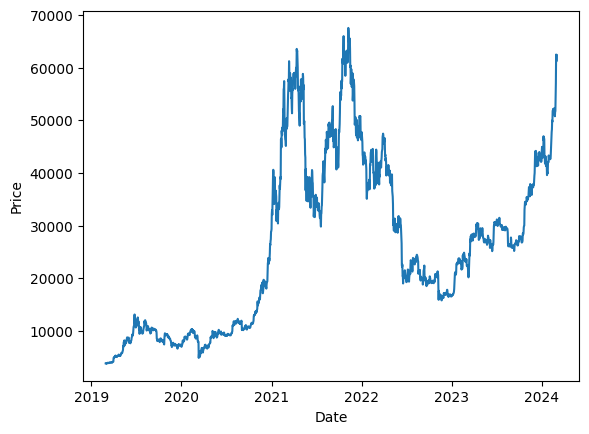

In [8]:
sns.lineplot(data = df, x = df.index, y = df['Price'])

In [9]:
#test the stationarity
def test_stationarity(data_frame, variable):
    from statsmodels.tsa.stattools import adfuller
    adfuller_test = adfuller(data_frame[variable], autolag = 'AIC')
    statistics  = pd.Series(adfuller_test[0:4], index = ['t-statistics', 'p-value', 'lags_used', 'number of observations used'])
    print(statistics)
    
    for key,values in adfuller_test[4].items():
        print('Criticality', key, ":", values)

In [10]:
test_stationarity(df, 'Price')

t-statistics                     -0.978718
p-value                           0.760947
lags_used                         9.000000
number of observations used    1818.000000
dtype: float64
Criticality 1% : -3.4339520666978056
Criticality 5% : -2.8631311116872475
Criticality 10% : -2.567617054512932


In [11]:
rolling_mean = df.rolling(window = 7).mean()
df['rolling_mean_diff'] = rolling_mean - df.shift()
df['7_diff'] = df['Price'].diff(7)

In [12]:
df.head(9)

,Price,rolling_mean_diff,7_diff
Date,,,
2019-03-01,3823.2,NaN,NaN
2019-03-02,3820.0,NaN,NaN
2019-03-03,3806.4,NaN,NaN
2019-03-04,3715.0,NaN,NaN
2019-03-05,3857.5,NaN,NaN
2019-03-06,3860.8,NaN,NaN
2019-03-07,3874.4,-38.328571,NaN
2019-03-08,3866.9,-45.685714,43.7
2019-03-09,3941.9,-20.771429,121.9


In [13]:
test_stationarity(df.dropna(),'rolling_mean_diff')

t-statistics                  -7.037304e+00
p-value                        5.970210e-10
lags_used                      2.300000e+01
number of observations used    1.797000e+03
dtype: float64
Criticality 1% : -3.4339942213257535
Criticality 5% : -2.8631497209507284
Criticality 10% : -2.567626963361616


In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

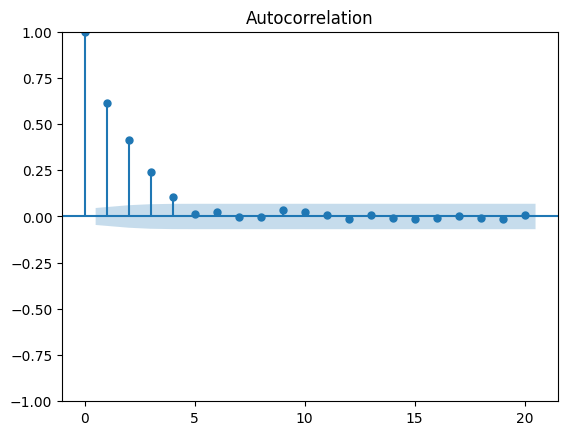

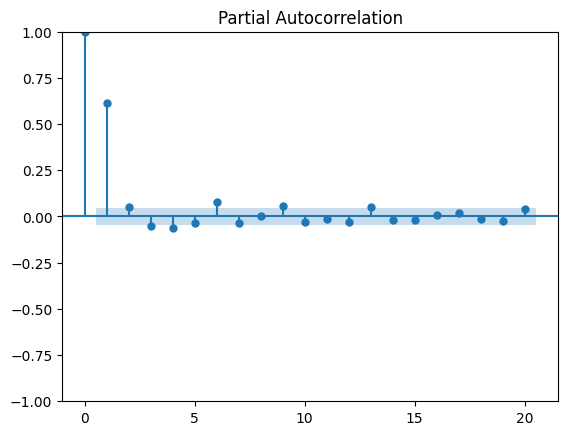

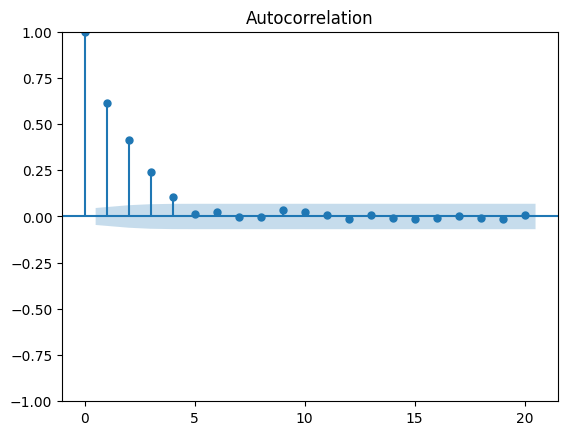

In [15]:
plot_pacf(df['rolling_mean_diff'].dropna(),lags=20)
plot_acf(df['rolling_mean_diff'].dropna(),lags=20)

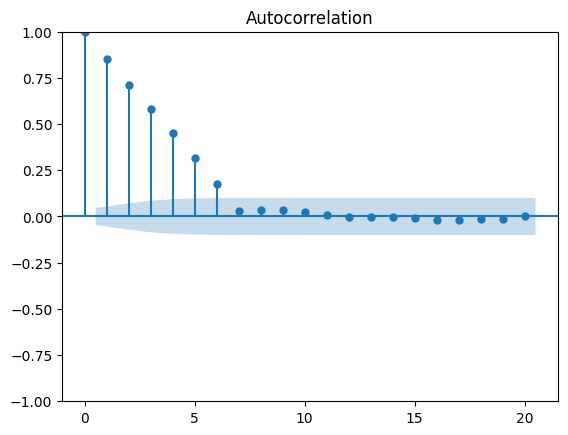

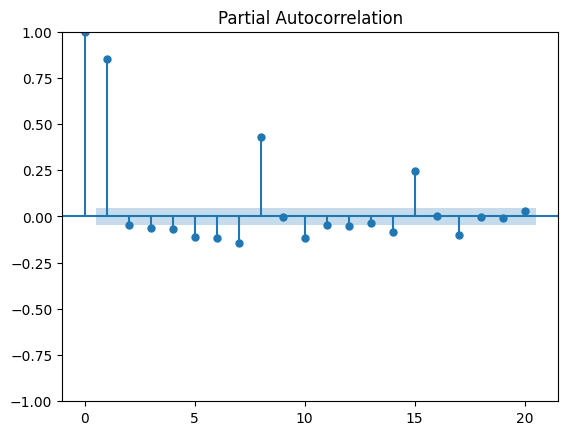

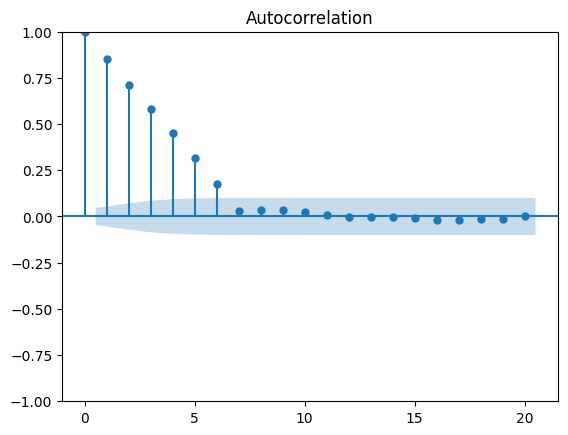

In [16]:
plot_pacf(df['7_diff'].dropna(),lags=20)
plot_acf(df['7_diff'].dropna(),lags=20)

In [17]:
train_data = df[:round(len(df)*70/100)]
test_data = df[round(len(df)*70/100):round(len(df)*90/100)]
val_data = df[round(len(df)*90/100):]

In [18]:
model = SARIMAX (train_data['Price'], order = (1,1,1), seasonal_order = (1,1,1,7))
model_fit = model.fit()
model_fit.summary()

C:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Price   No. Observations:                 1280
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood              -10822.130
Date:                           Mon, 06 May 2024   AIC                          21654.261
Time:                                   23:03:30   BIC                          21680.003
Sample:                               03-01-2019   HQIC                         21663.930
                                    - 08-31-2022                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0000   1129.701     -0.001      0.999   -2215.174    2213.174
ma.L1          1.0000   1129.699      0.001      0.999   -2213.170    2215.170
ar.S.L7       -0.0437      0.017     -2.608      0.009      -0.077      -0.011
ma.S.L7       -0.9999      0.019    -52.022      0.000      -1.038      -0.962
sigma2        1.4e+06      0.268   5.22e+06      0.000     1.4e+06     1.4e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.84   Jarque-Bera (JB):              2340.57
Prob(Q):                              0.17   Prob(JB):                         0.00
Heteroskedasticity (H):              15.16   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.06e+24. Standard errors may be unstable.
"""

In [19]:
prediction = model_fit.predict(start = test_data.index[0], end = test_data.index[-1])
prediction_val = model_fit.predict(start = val_data.index[0],end = val_data.index[-1])
df['prediction'] = prediction
df['prediction_val'] = prediction_val

Text(0, 0.5, 'Price')

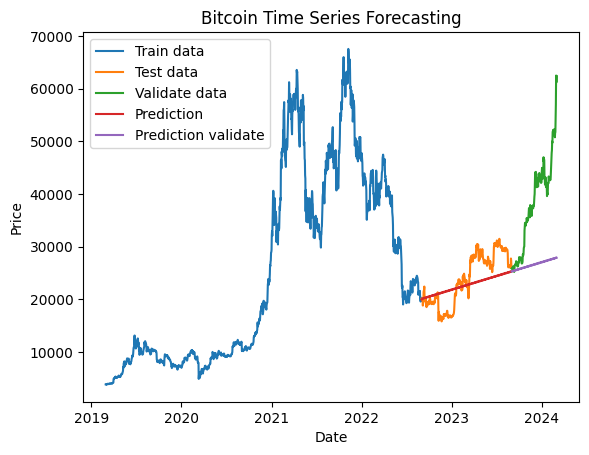

In [21]:
sns.lineplot(data=train_data, x=train_data.index, y=train_data['Price'],label='Train data')
sns.lineplot(data=test_data, x=test_data.index, y=test_data['Price'],label='Test data')
sns.lineplot(data=val_data, x=val_data.index, y=val_data['Price'],label='Validate data')
sns.lineplot(data=df, x=df.index, y=df['prediction'],label='Prediction')
sns.lineplot(data=df, x=df.index, y=df['prediction_val'],label='Prediction validate')
plt.title('Bitcoin Time Series Forecasting')
plt.xlabel('Date')
plt.ylabel('Price')